# Logistic Regresion

## APS Failure Logistic Regression on Clean Training Data

Performed a train-test split on the cleaned training data, trained the model, found the accuracy score, confusion matrix, classification report, and  created PCA Visualization.

Accuracy: 0.9908888888888889

Confusion Matrix:
 [[17630    68]
 [   96   206]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     17698
           1       0.75      0.68      0.72       302

    accuracy                           0.99     18000
   macro avg       0.87      0.84      0.86     18000
weighted avg       0.99      0.99      0.99     18000



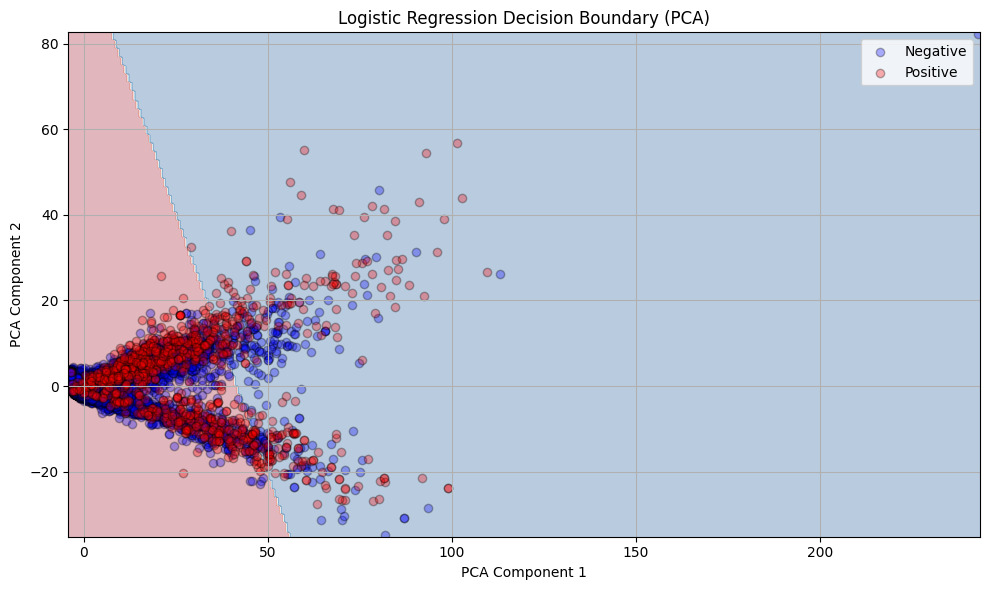

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the data
df = pd.read_csv(
    "C:/Users/bianc/.vscode/KaggleProjects/APS-Failure-Classification-Model/data/cleaned.csv")

# Separate features and target
X = df.drop('class', axis=1)  # All feature columns
y = df['class']               # Target column

# Convert target labels to binary ('pos' = 1, 'neg' = 0)
y = y.map({'pos': 1, 'neg': 0})

# Normalize features (mean=0, standard deviation=1)
scaler = StandardScaler()          # tool to compute the mean and standard deviation for each column and apply the transformation
X_scaled = scaler.fit_transform(X) # .fit(X) → Calculates the mean and standard deviation of each column in X
                                   # .transform(X) → Applies this formula to each element: (x-mean/std)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- PCA Visualization (2D) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Retrain model on PCA data for plotting
model_pca = LogisticRegression(max_iter=1000, random_state=42)
model_pca.fit(X_pca, y)

# Plot with decision boundary
def plot_decision_boundary(ax, X, y, model):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap='RdBu', alpha=0.3)
    ax.scatter(X[y == 0, 0], X[y == 0, 1], alpha=0.3, label='Negative', c='blue', edgecolors='k')
    ax.scatter(X[y == 1, 0], X[y == 1, 1], alpha=0.3, label='Positive', c='red', edgecolors='k')
    ax.set_title("Logistic Regression Decision Boundary (PCA)")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.legend()
    ax.grid(True)

# Display plot
fig, ax = plt.subplots(figsize=(10, 6))
plot_decision_boundary(ax, X_pca, y, model_pca)
plt.tight_layout()
plt.show()